### 붓꽃 데이터 셋 LDA 적용 

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris 

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape


(150, 2)

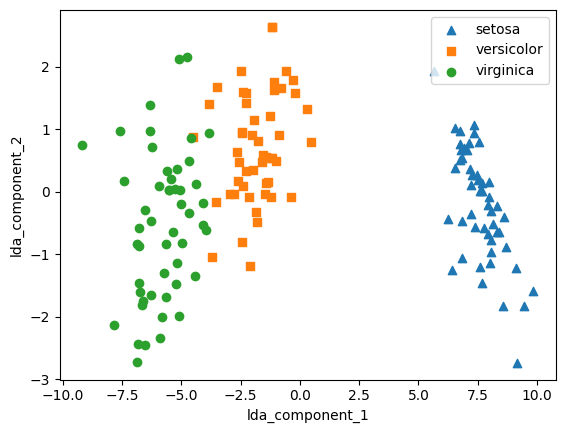

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

lda_columns = ['lda_component_1', 'lda_component_2']
irisdf_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisdf_lda['target'] = iris.target #결정값 

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisdf_lda[irisdf_lda['target']==i]['lda_component_1']
    y_axis_data = irisdf_lda[irisdf_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()